In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
from scipy.stats import erlang
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import tensorflow as tf
import numpy as np
from scipy.stats import poisson
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.combine import SMOTEENN
from imblearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import (
    train_test_split,
    KFold
)
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
    classification_report
)
import random
from sklearn.model_selection import cross_val_score
from datetime import datetime, timedelta
import datetime
from imblearn.over_sampling import SMOTE
import time
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.svm import SVC
from sklearn.datasets import make_classification
import numpy as np
from scipy.stats import chisquare
import numpy as np
from scipy.stats import lognorm
from scipy.stats import kstest



2024-05-09 04:38:16.114999: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
df = pd.read_csv('lab.csv')
data = pd.read_csv("Sumlab.csv")

# Processing data

In [3]:
df = df.drop(columns=['Prelab1-lastSubmit','Inlab1-lastSubmit','Prelab2-lastSubmit','Inlab2-lastSubmit','Prelab3-lastSubmit','Inlab3-lastSubmit','Prelab4-lastSubmit','Inlab4-lastSubmit'])
df = df.drop(columns=['Prelab1-timeSpent','Inlab1-timeSpent','Prelab2-timeSpent','Inlab2-timeSpent','Prelab3-timeSpent','Inlab3-timeSpent','Prelab4-timeSpent','Inlab4-timeSpent'])
data = data.drop(columns=['Prelab-timeSpent', 'Prelab-lastSubmit','Inlab-timeSpent','Inlab-lastSubmit'])
df = df.drop(columns=['studentID'])

In [4]:
"""Prelab_min, Prelab_max = data["Prelab"].min(), data["Prelab"].max()
Prelab_attempts_min, Prelab_attempts_max = data["Prelab-attempts"].min(), data["Prelab-attempts"].max()
Prelab_questions_min, Prelab_questions_max = data["Prelab-questions"].min(), data["Prelab-questions"].max()
Prelab_growths_min, Prelab_growths_max = data["Prelab-growths"].min(), data["Prelab-growths"].max()
Inlab_min, Inlab_max = data["Inlab"].min(), data["Inlab"].max()
Inlab_attempts_min, Inlab_attempts_max = data["Inlab-attempts"].min(), data["Inlab-attempts"].max()
Inlab_questions_min, Inlab_questions_max = data["Inlab-questions"].min(), data["Inlab-questions"].max()
Inlab_growths_min, Inlab_growths_max = data["Inlab-growths"].min(), data["Inlab-growths"].max()"""


'Prelab_min, Prelab_max = data["Prelab"].min(), data["Prelab"].max()\nPrelab_attempts_min, Prelab_attempts_max = data["Prelab-attempts"].min(), data["Prelab-attempts"].max()\nPrelab_questions_min, Prelab_questions_max = data["Prelab-questions"].min(), data["Prelab-questions"].max()\nPrelab_growths_min, Prelab_growths_max = data["Prelab-growths"].min(), data["Prelab-growths"].max()\nInlab_min, Inlab_max = data["Inlab"].min(), data["Inlab"].max()\nInlab_attempts_min, Inlab_attempts_max = data["Inlab-attempts"].min(), data["Inlab-attempts"].max()\nInlab_questions_min, Inlab_questions_max = data["Inlab-questions"].min(), data["Inlab-questions"].max()\nInlab_growths_min, Inlab_growths_max = data["Inlab-growths"].min(), data["Inlab-growths"].max()'

In [5]:
"""
data_Prelab = pd.cut(data['Prelab'], bins=np.linspace(Prelab_min, Prelab_max, 21), labels=False)

data_Prelab = pd.cut(data['Prelab-attempts'], bins=np.linspace(Prelab_attempts_min, Prelab_attempts_max, 21), labels=False)

data_Prelab_questions = pd.cut(data['Prelab-questions'], bins=np.linspace(Prelab_questions_min, Prelab_questions_max, 21), labels=False)

data_Prelab_growths = pd.cut(data['Prelab-growths'], bins=np.linspace(Prelab_growths_min, Prelab_growths_max, 21), labels=False)

data_Inlab = pd.cut(data['Inlab'], bins=np.linspace(Inlab_min, Inlab_max, 21), labels=False)

data_Inlab_attempts = pd.cut(data['Inlab-attempts'], bins=np.linspace(Inlab_attempts_min, Inlab_attempts_max, 21), labels=False)

data_Inlab_questions = pd.cut(data['Inlab-questions'], bins=np.linspace(Inlab_questions_min, Inlab_questions_max, 21), labels=False)

data_Inlab_growths = pd.cut(data['Inlab-growths'], bins=np.linspace(Inlab_growths_min, Inlab_growths_max, 21), labels=False)
"""

"\ndata_Prelab = pd.cut(data['Prelab'], bins=np.linspace(Prelab_min, Prelab_max, 21), labels=False)\n\ndata_Prelab = pd.cut(data['Prelab-attempts'], bins=np.linspace(Prelab_attempts_min, Prelab_attempts_max, 21), labels=False)\n\ndata_Prelab_questions = pd.cut(data['Prelab-questions'], bins=np.linspace(Prelab_questions_min, Prelab_questions_max, 21), labels=False)\n\ndata_Prelab_growths = pd.cut(data['Prelab-growths'], bins=np.linspace(Prelab_growths_min, Prelab_growths_max, 21), labels=False)\n\ndata_Inlab = pd.cut(data['Inlab'], bins=np.linspace(Inlab_min, Inlab_max, 21), labels=False)\n\ndata_Inlab_attempts = pd.cut(data['Inlab-attempts'], bins=np.linspace(Inlab_attempts_min, Inlab_attempts_max, 21), labels=False)\n\ndata_Inlab_questions = pd.cut(data['Inlab-questions'], bins=np.linspace(Inlab_questions_min, Inlab_questions_max, 21), labels=False)\n\ndata_Inlab_growths = pd.cut(data['Inlab-growths'], bins=np.linspace(Inlab_growths_min, Inlab_growths_max, 21), labels=False)\n"

In [6]:
"""
from sklearn.preprocessing import PowerTransformer

data[data.columns] = PowerTransformer(method='yeo-johnson', standardize=True, copy=True).fit_transform(data[data.columns])

print(data)
"""

"\nfrom sklearn.preprocessing import PowerTransformer\n\ndata[data.columns] = PowerTransformer(method='yeo-johnson', standardize=True, copy=True).fit_transform(data[data.columns])\n\nprint(data)\n"

In [7]:
data

,Prelab,Prelab-attempts,Prelab-questions,Prelab-growths,Inlab,Inlab-attempts,Inlab-questions,Inlab-growths,labNum
0,9.9,13.0,10.0,1.364,9.272,10.0,10.0,0.000,1
1,10.0,19.0,10.0,4.200,9.236,14.0,10.0,2.636,1
2,10.0,15.0,10.0,0.500,10.000,13.0,10.0,1.363,1
3,10.0,12.0,10.0,0.100,10.000,11.0,10.0,0.000,1
4,10.0,10.0,10.0,0.000,10.000,10.0,10.0,0.000,1
...,...,...,...,...,...,...,...,...,...
3139,0.0,0.0,0.0,0.000,0.000,0.0,0.0,0.000,4
3140,0.0,0.0,0.0,0.000,0.000,0.0,0.0,0.000,4
3141,0.0,0.0,0.0,0.000,0.000,0.0,0.0,0.000,4
3142,0.0,0.0,0.0,0.000,0.000,0.0,0.0,0.000,4


In [8]:
lab1 = data[data['labNum'] == 1]
lab2 = data[data['labNum'] == 2]
lab3 = data[data['labNum'] == 3]
lab4 = data[data['labNum'] == 4]

In [9]:
lab1.columns

Index(['Prelab', 'Prelab-attempts', 'Prelab-questions', 'Prelab-growths',
       'Inlab', 'Inlab-attempts', 'Inlab-questions', 'Inlab-growths',
       'labNum'],
      dtype='object')

# Train_test 

In [10]:
"""def ranking(score):
    if score >= 8.5:
        return 4
    if score >= 7.0:
        return 3
    if score >= 5.5:
        return 2
    if score >= 4.0:
        return 1
    return 0
def passRanking(x):
    if x >= 5:
        return 1
    else:
        return 0
columns_to_rank = ['Inlab']
for column in columns_to_rank:
    lab1[column] = lab1[column].apply(ranking)"""

"def ranking(score):\n    if score >= 8.5:\n        return 4\n    if score >= 7.0:\n        return 3\n    if score >= 5.5:\n        return 2\n    if score >= 4.0:\n        return 1\n    return 0\ndef passRanking(x):\n    if x >= 5:\n        return 1\n    else:\n        return 0\ncolumns_to_rank = ['Inlab']\nfor column in columns_to_rank:\n    lab1[column] = lab1[column].apply(ranking)"

In [11]:
def round_number(number):
    decimal_part = number - int(number)
    if decimal_part >= 0.5:
        return int(number) + 1
    else:
        return int(number)
columns_to_rank = ['Inlab', 'Prelab']
for column in columns_to_rank:
    lab1[column] = lab1[column].apply(round_number)

/var/folders/qr/gy7cr29x2191c6hj0d324psm0000gn/T/ipykernel_14985/1925004452.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab1[column] = lab1[column].apply(round_number)
/var/folders/qr/gy7cr29x2191c6hj0d324psm0000gn/T/ipykernel_14985/1925004452.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab1[column] = lab1[column].apply(round_number)


In [12]:
lab1 = lab1.drop(columns=['labNum'])
lab1

,Prelab,Prelab-attempts,Prelab-questions,Prelab-growths,Inlab,Inlab-attempts,Inlab-questions,Inlab-growths
0,10,13.0,10.0,1.364,9,10.0,10.0,0.000
1,10,19.0,10.0,4.200,9,14.0,10.0,2.636
2,10,15.0,10.0,0.500,10,13.0,10.0,1.363
3,10,12.0,10.0,0.100,10,11.0,10.0,0.000
4,10,10.0,10.0,0.000,10,10.0,10.0,0.000
...,...,...,...,...,...,...,...,...
781,0,0.0,0.0,0.000,0,0.0,0.0,0.000
782,0,0.0,0.0,0.000,0,0.0,0.0,0.000
783,0,0.0,0.0,0.000,0,0.0,0.0,0.000
784,0,0.0,0.0,0.000,0,0.0,0.0,0.000


In [13]:
X1 = lab1[['Prelab', 'Prelab-attempts', 'Prelab-questions', 
            'Prelab-growths',
            'Inlab', 'Inlab-attempts', 'Inlab-questions', 
            'Inlab-growths']] 
y1 = lab1['Inlab'] 
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.5, stratify=y1)

In [14]:
X_train


,Prelab,Prelab-attempts,Prelab-questions,Prelab-growths,Inlab,Inlab-attempts,Inlab-questions,Inlab-growths
263,10,11.0,10.0,0.545,10,14.0,10.0,1.000
540,10,13.0,10.0,0.909,10,10.0,10.0,0.000
87,10,10.0,10.0,0.000,10,10.0,10.0,0.000
251,10,11.0,10.0,0.000,10,10.0,10.0,0.000
687,10,12.0,10.0,1.000,5,9.0,9.0,0.000
...,...,...,...,...,...,...,...,...
208,10,16.0,10.0,1.281,3,13.0,10.0,0.800
23,10,11.0,10.0,0.100,10,10.0,10.0,0.000
616,5,9.0,9.0,0.000,2,6.0,5.0,1.454
505,10,14.0,10.0,2.100,9,11.0,10.0,0.000


In [15]:
col_mins = np.min(X_train, axis=0)
col_maxs = np.max(X_train, axis=0)

In [16]:
col_maxs

Prelab              10.000
Prelab-attempts     26.000
Prelab-questions    10.000
Prelab-growths       7.154
Inlab               10.000
Inlab-attempts      25.000
Inlab-questions     10.000
Inlab-growths        7.000
dtype: float64

# train the model CGan

In [17]:

col_mins = np.min(X_train, axis=0)
col_maxs = np.max(X_train, axis=0)

def build_generator(latent_dim, output_dim, col_mins, col_maxs):
    model = models.Sequential()
    model.add(layers.Dense(128, input_dim=latent_dim, activation='relu'))
    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.Dense(output_dim, activation='sigmoid'))
    return model

def build_discriminator(input_dim):
    model = models.Sequential()
    model.add(layers.Dense(128, input_dim=input_dim, activation='relu'))
    model.add(layers.Dropout(0.3))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dropout(0.3))
    model.add(layers.Dense(1, activation='sigmoid'))
    return model

def build_cgan(generator, discriminator):
    discriminator.trainable = False
    model = models.Sequential()
    model.add(generator)
    model.add(discriminator)
    return model

# Generate fake samples
def generate_fake_samples(generator, latent_dim, n_samples, col_mins, col_maxs):
    X = np.zeros((n_samples, len(col_mins)))  # Tạo ma trận X với kích thước phù hợp
    for i in range(len(col_mins)):
        X[:, i] = np.random.uniform(col_mins[i], col_maxs[i], size=n_samples)  # Tạo giá trị ngẫu nhiên trong khoảng từ min đến max cho mỗi cột
    y = np.zeros((n_samples, 1))  # Tạo nhãn
    return X, y

# Train the CGAN
def train_cgan(generator, discriminator, cgan, X_real, latent_dim, col_mins, col_maxs, n_epochs=100, n_batch=128):
    half_batch = int(n_batch / 2)
    for epoch in range(n_epochs):
        # Train discriminator
        X_real, y_real = X_real[:half_batch], np.ones((half_batch, 1))
        d_loss_real = discriminator.train_on_batch(X_real, y_real)
        X_fake, y_fake = generate_fake_samples(generator, latent_dim, half_batch, col_mins, col_maxs)
        d_loss_fake = discriminator.train_on_batch(X_fake, y_fake)
        d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

        # Train generator
        X_gan = np.random.randn(latent_dim * n_batch)
        X_gan = X_gan.reshape(n_batch, latent_dim)
        y_gan = np.ones((n_batch, 1))
        g_loss = cgan.train_on_batch(X_gan, y_gan)

        # Print the progress
        print(f"Epoch: {epoch + 1}, D Loss: {d_loss}, G Loss: {g_loss}")


X_real = np.array(X_train)  
input_dim = X_real.shape[1]
latent_dim = 100  
# minmax
col_mins = np.min(X_real, axis=0)
col_maxs = np.max(X_real, axis=0)

generator = build_generator(latent_dim, input_dim, col_mins, col_maxs)

discriminator = build_discriminator(input_dim)
cgan = build_cgan(generator, discriminator)
discriminator.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
cgan.compile(loss='binary_crossentropy', optimizer='adam')

# Train  CGAN
train_cgan(generator, discriminator, cgan, X_real, latent_dim, col_mins, col_maxs)


Epoch: 1, D Loss: [3.53428885 0.5       ], G Loss: 0.8898110389709473
Epoch: 2, D Loss: [3.64616986 0.5078125 ], G Loss: 0.8515208959579468
Epoch: 3, D Loss: [3.64805523 0.5       ], G Loss: 0.8272566795349121
Epoch: 4, D Loss: [3.32279532 0.5078125 ], G Loss: 0.8126674890518188
Epoch: 5, D Loss: [3.7266366 0.5078125], G Loss: 0.7993007302284241
Epoch: 6, D Loss: [3.63688734 0.484375  ], G Loss: 0.7726765871047974
Epoch: 7, D Loss: [3.25424258 0.5390625 ], G Loss: 0.7624481916427612
Epoch: 8, D Loss: [3.29527157 0.5078125 ], G Loss: 0.7588760852813721
Epoch: 9, D Loss: [3.43817637 0.484375  ], G Loss: 0.7474724650382996
Epoch: 10, D Loss: [3.5192034 0.5      ], G Loss: 0.7327679395675659
Epoch: 11, D Loss: [3.72582048 0.53125   ], G Loss: 0.7272764444351196
Epoch: 12, D Loss: [3.85586232 0.5       ], G Loss: 0.7234464883804321
Epoch: 13, D Loss: [3.54218992 0.5078125 ], G Loss: 0.7191964983940125
Epoch: 14, D Loss: [3.43483755 0.5       ], G Loss: 0.7147578597068787
Epoch: 15, D Loss: 

In [18]:
n_new_samples = 1000
new_fake_data, _ = generate_fake_samples(generator, latent_dim, n_new_samples, col_mins, col_maxs)


In [19]:
column_names = ['Prelab', 'Prelab-attempts', 'Prelab-questions', 'Prelab-growths',
       'Inlab', 'Inlab-attempts', 'Inlab-questions', 'Inlab-growths']
df = pd.DataFrame(new_fake_data, columns=column_names)
print(df)

       Prelab  Prelab-attempts  Prelab-questions  Prelab-growths     Inlab  \
0    9.325319         5.657410          8.400036        5.014942  3.443908   
1    1.084230        14.339065          1.433212        2.495795  4.953879   
2    4.664483         1.555681          1.135236        4.555367  7.489312   
3    5.014605        14.120674          4.152537        1.611007  6.690076   
4    8.216860         1.943582          5.081954        2.101214  0.973089   
..        ...              ...               ...             ...       ...   
995  7.163588        14.841437          6.890992        6.804000  3.487711   
996  0.356599        15.541649          8.217796        5.263880  8.705302   
997  1.764008        13.837251          4.396466        5.321474  7.796814   
998  1.598733        22.194464          8.397851        3.440321  8.682423   
999  0.082972        17.117931          1.115497        3.403154  0.882514   

     Inlab-attempts  Inlab-questions  Inlab-growths  
0        

In [41]:
print(lab1)

     Prelab  Prelab-attempts  Prelab-questions  Prelab-growths  Inlab  \
0        10             13.0              10.0           1.364      9   
1        10             19.0              10.0           4.200      9   
2        10             15.0              10.0           0.500     10   
3        10             12.0              10.0           0.100     10   
4        10             10.0              10.0           0.000     10   
..      ...              ...               ...             ...    ...   
781       0              0.0               0.0           0.000      0   
782       0              0.0               0.0           0.000      0   
783       0              0.0               0.0           0.000      0   
784       0              0.0               0.0           0.000      0   
785       0              0.0               0.0           0.000      0   

     Inlab-attempts  Inlab-questions  Inlab-growths  
0              10.0             10.0          0.000  
1              

# check phân phối

In [21]:
from scipy import stats
data = lab1['Prelab']
statistic, p_value = stats.shapiro(data)
alpha = 0.05
print("Kiểm định Shapiro-Wilk:")
print("Statistic:", statistic)
print("p-value:", p_value)
if p_value > alpha:
    print("Không đủ bằng chứng để bác bỏ giả thuyết H0: Dữ liệu có phân phối chuẩn.")
else:
    print("Có bằng chứng để bác bỏ giả thuyết H0: Dữ liệu không có phân phối chuẩn.")


Kiểm định Shapiro-Wilk:
Statistic: 0.5077104568481445
p-value: 5.102127708606659e-42
Có bằng chứng để bác bỏ giả thuyết H0: Dữ liệu không có phân phối chuẩn.


In [22]:
#phân phối Poisson

df = lab1
for column in df.columns:
    data = df[column].values
    # Sử dụng kiểm định goodness-of-fit Kolmogorov-Smirnov
    kstest_result = kstest(data, 'poisson', args=(data.mean(),))
    print(f"Kiểm tra cột {column}:")
    print("Statistic:", kstest_result.statistic)
    print("P-value:", kstest_result.pvalue)
    alpha = 0.05
    if kstest_result.pvalue > alpha:
        print("Dữ liệu tuân theo phân phối Poisson")
    else:
        print("Dữ liệu không tuân theo phân phối Poisson")



Kiểm tra cột Prelab:
Statistic: 0.45783627383899683
P-value: 3.602006777371614e-151
Dữ liệu không tuân theo phân phối Poisson
Kiểm tra cột Prelab-attempts:
Statistic: 0.2596549072828397
P-value: 3.114007604472608e-47
Dữ liệu không tuân theo phân phối Poisson
Kiểm tra cột Prelab-questions:
Statistic: 0.5562811963985098
P-value: 2.038094003585703e-229
Dữ liệu không tuân theo phân phối Poisson
Kiểm tra cột Prelab-growths:
Statistic: 0.36747119523524646
P-value: 1.1005757919023733e-95
Dữ liệu không tuân theo phân phối Poisson
Kiểm tra cột Inlab:
Statistic: 0.4026558198338405
P-value: 1.399162507488346e-115
Dữ liệu không tuân theo phân phối Poisson
Kiểm tra cột Inlab-attempts:
Statistic: 0.3273121648942677
P-value: 1.7182997036779667e-75
Dữ liệu không tuân theo phân phối Poisson
Kiểm tra cột Inlab-questions:
Statistic: 0.5238550577839723
P-value: 2.1573563876051936e-201
Dữ liệu không tuân theo phân phối Poisson
Kiểm tra cột Inlab-growths:
Statistic: 0.4250538059084352
P-value: 2.31045816071

In [23]:
#phân phối t (Student's t-Distribution)

df = lab1
for column in df.columns:
    data = df[column]
    kstest_result = kstest(data, 't', args=(data.mean(), data.std()))
    print("Kiểm định cho cột", column)
    print("Statistic:", kstest_result.statistic)
    print("P-value:", kstest_result.pvalue)
    alpha = 0.05
    if kstest_result.pvalue > alpha:
        print("Chấp nhận H0: Dữ liệu tuân theo phân phối t")
    else:
        print("Từ chối H0: Dữ liệu không tuân theo phân phối t")
    print()


Kiểm định cho cột Prelab
Statistic: 0.8790571904806368
P-value: 0.0
Từ chối H0: Dữ liệu không tuân theo phân phối t

Kiểm định cho cột Prelab-attempts
Statistic: 0.9108173420362188
P-value: 0.0
Từ chối H0: Dữ liệu không tuân theo phân phối t

Kiểm định cho cột Prelab-questions
Statistic: 0.914028096769348
P-value: 0.0
Từ chối H0: Dữ liệu không tuân theo phân phối t

Kiểm định cho cột Prelab-growths
Statistic: 0.2707967135693771
P-value: 2.1006274297590024e-51
Từ chối H0: Dữ liệu không tuân theo phân phối t

Kiểm định cho cột Inlab
Statistic: 0.781518786341846
P-value: 0.0
Từ chối H0: Dữ liệu không tuân theo phân phối t

Kiểm định cho cột Inlab-attempts
Statistic: 0.8590364938101898
P-value: 0.0
Từ chối H0: Dữ liệu không tuân theo phân phối t

Kiểm định cho cột Inlab-questions
Statistic: 0.863394961728205
P-value: 0.0
Từ chối H0: Dữ liệu không tuân theo phân phối t

Kiểm định cho cột Inlab-growths
Statistic: 0.3302440593448467
P-value: 7.064397291333543e-77
Từ chối H0: Dữ liệu không tuâ

In [24]:

data = lab1
alpha = 0.05
for column, values in data.items():
    observed_values = np.array(values)
    expected_values = np.mean(observed_values)  # Trung bình là giả định trong phân phối Chi-Square
    # Kiểm định goodness-of-fit Chi-Square
    chi2, p = chisquare(observed_values, f_exp=expected_values)
    print(f"Kiểm định goodness-of-fit Chi-Square cho cột '{column}':")
    print("Statistic:", chi2)
    print("P-value:", p)
    if p > alpha:
        print("Chấp nhận H0: Dữ liệu tuân theo phân phối Chi-Square")
    else:
        print("Từ chối H0: Dữ liệu không tuân theo phân phối Chi-Square")
    print()


Kiểm định goodness-of-fit Chi-Square cho cột 'Prelab':
Statistic: 750.1973626373626
P-value: 0.8091523185379947
Chấp nhận H0: Dữ liệu tuân theo phân phối Chi-Square

Kiểm định goodness-of-fit Chi-Square cho cột 'Prelab-attempts':
Statistic: 1198.8510569105692
P-value: 7.734183262499209e-20
Từ chối H0: Dữ liệu không tuân theo phân phối Chi-Square

Kiểm định goodness-of-fit Chi-Square cho cột 'Prelab-questions':
Statistic: 535.7636363636365
P-value: 0.9999999999993666
Chấp nhận H0: Dữ liệu tuân theo phân phối Chi-Square

Kiểm định goodness-of-fit Chi-Square cho cột 'Prelab-growths':
Statistic: 1461.1970245055986
P-value: 2.7764590355556662e-43
Từ chối H0: Dữ liệu không tuân theo phân phối Chi-Square

Kiểm định goodness-of-fit Chi-Square cho cột 'Inlab':
Statistic: 1128.3785679334528
P-value: 8.779635831872051e-15
Từ chối H0: Dữ liệu không tuân theo phân phối Chi-Square

Kiểm định goodness-of-fit Chi-Square cho cột 'Inlab-attempts':
Statistic: 1297.927797833935
P-value: 6.578851222996415e

In [25]:
# Sử dụng kiểm định goodness-of-fit Kolmogorov-Smirnov cho mỗi cột
data_column = data
alpha = 0.05  
for column_name, column_data in data.items():
   
    if np.issubdtype(column_data.dtype, np.number):
        
        # H0: Dữ liệu tuân theo phân phối F
        # H1: Dữ liệu không tuân theo phân phối F
        kstest_result = kstest(column_data, 'f', args=(column_data.mean(), column_data.var()))
        print(f"Kiểm tra cột {column_name}:")
        print("Statistic:", kstest_result.statistic)
        print("P-value:", kstest_result.pvalue)
        if kstest_result.pvalue > alpha:
            print("Chấp nhận H0: Dữ liệu tuân theo phân phối F")
        else:
            print("Từ chối H0: Dữ liệu không tuân theo phân phối F")
        print()


Kiểm tra cột Prelab:
Statistic: 0.8826558745607248
P-value: 0.0
Từ chối H0: Dữ liệu không tuân theo phân phối F

Kiểm tra cột Prelab-attempts:
Statistic: 0.9219125215836383
P-value: 0.0
Từ chối H0: Dữ liệu không tuân theo phân phối F

Kiểm tra cột Prelab-questions:
Statistic: 0.8989784146577935
P-value: 0.0
Từ chối H0: Dữ liệu không tuân theo phân phối F

Kiểm tra cột Prelab-growths:
Statistic: 0.3753180661577608
P-value: 6.112417235969168e-100
Từ chối H0: Dữ liệu không tuân theo phân phối F

Kiểm tra cột Inlab:
Statistic: 0.8317102784360839
P-value: 0.0
Từ chối H0: Dữ liệu không tuân theo phân phối F

Kiểm tra cột Inlab-attempts:
Statistic: 0.8942844343653038
P-value: 0.0
Từ chối H0: Dữ liệu không tuân theo phân phối F

Kiểm tra cột Inlab-questions:
Statistic: 0.869729839829993
P-value: 0.0
Từ chối H0: Dữ liệu không tuân theo phân phối F

Kiểm tra cột Inlab-growths:
Statistic: 0.4770992366412214
P-value: 6.313535318516525e-165
Từ chối H0: Dữ liệu không tuân theo phân phối F



In [26]:

# Thiết lập các thông số cho phân phối Erlang
k = 2 
scale = 3  
for column_name, column_data in data.items():
    kstest_result = kstest(column_data, 'erlang', args=(k, scale))

    print("Cột:", column_name)
    print("Statistic:", kstest_result.statistic)
    print("P-value:", kstest_result.pvalue)
    alpha = 0.05
    if kstest_result.pvalue > alpha:
        print("Chấp nhận H0: Dữ liệu tuân theo phân phối Erlang")
    else:
        print("Từ chối H0: Dữ liệu không tuân theo phân phối Erlang")


Cột: Prelab
Statistic: 0.8119896208044695
P-value: 0.0
Từ chối H0: Dữ liệu không tuân theo phân phối Erlang
Cột: Prelab-attempts
Statistic: 0.8834120935419614
P-value: 0.0
Từ chối H0: Dữ liệu không tuân theo phân phối Erlang
Cột: Prelab-questions
Statistic: 0.8732339764936153
P-value: 0.0
Từ chối H0: Dữ liệu không tuân theo phân phối Erlang
Cột: Prelab-growths
Statistic: 0.9155936258808612
P-value: 0.0
Từ chối H0: Dữ liệu không tuân theo phân phối Erlang
Cột: Inlab
Statistic: 0.6809463638070139
P-value: 0.0
Từ chối H0: Dữ liệu không tuân theo phân phối Erlang
Cột: Inlab-attempts
Statistic: 0.8223433912518852
P-value: 0.0
Từ chối H0: Dữ liệu không tuân theo phân phối Erlang
Cột: Inlab-questions
Statistic: 0.8096207449414525
P-value: 0.0
Từ chối H0: Dữ liệu không tuân theo phân phối Erlang
Cột: Inlab-growths
Statistic: 0.9287531806615776
P-value: 0.0
Từ chối H0: Dữ liệu không tuân theo phân phối Erlang


In [27]:

# Sử dụng kiểm định goodness-of-fit Kolmogorov-Smirnov cho từng cột
alpha = 0.05
for column, values in data.items():
    kstest_result = kstest(values, 'lognorm', args=(values.mean(), values.std()))
    print(f"Kiểm định cho cột {column}:")
    print("Statistic:", kstest_result.statistic)
    print("P-value:", kstest_result.pvalue)
    if kstest_result.pvalue > alpha:
        print("Chấp nhận H0: Dữ liệu tuân theo phân phối Log-Normal")
    else:
        print("Từ chối H0: Dữ liệu không tuân theo phân phối Log-Normal")
    print()


Kiểm định cho cột Prelab:
Statistic: 0.4376139653576788
P-value: 1.7468102503839168e-137
Từ chối H0: Dữ liệu không tuân theo phân phối Log-Normal

Kiểm định cho cột Prelab-attempts:
Statistic: 0.45719351858594703
P-value: 1.0076610430327122e-150
Từ chối H0: Dữ liệu không tuân theo phân phối Log-Normal

Kiểm định cho cột Prelab-questions:
Statistic: 0.47452046193960734
P-value: 4.8243046356806704e-163
Từ chối H0: Dữ liệu không tuân theo phân phối Log-Normal

Kiểm định cho cột Prelab-growths:
Statistic: 0.7336943718020975
P-value: 0.0
Từ chối H0: Dữ liệu không tuân theo phân phối Log-Normal

Kiểm định cho cột Inlab:
Statistic: 0.4040332665851688
P-value: 2.1075100423079927e-116
Từ chối H0: Dữ liệu không tuân theo phân phối Log-Normal

Kiểm định cho cột Inlab-attempts:
Statistic: 0.406728734479886
P-value: 5.0752629990036005e-118
Từ chối H0: Dữ liệu không tuân theo phân phối Log-Normal

Kiểm định cho cột Inlab-questions:
Statistic: 0.42146748961169234
P-value: 4.269194003670762e-127
Từ ch

# chart

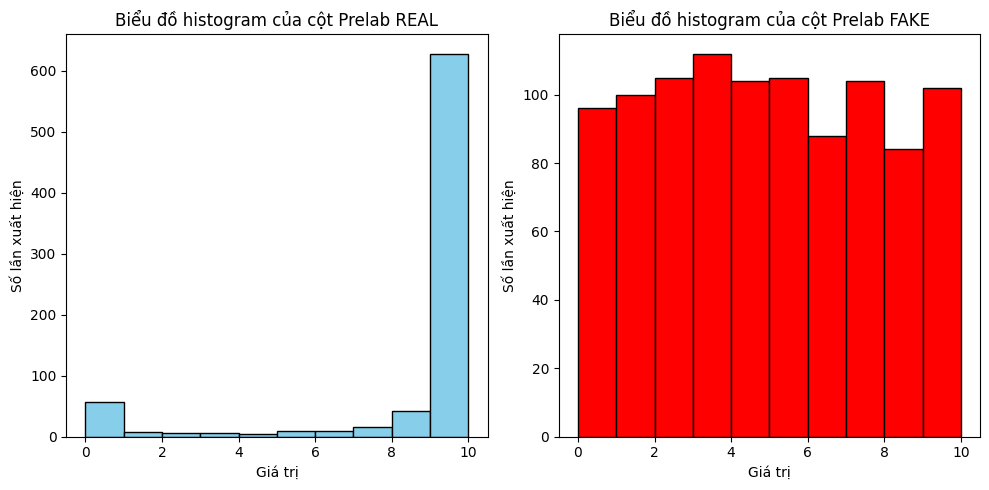

In [43]:

Real = lab1['Prelab']
Fake = df['Prelab']
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(Real, color='skyblue', edgecolor='black')
plt.xlabel('Giá trị')
plt.ylabel('Số lần xuất hiện')
plt.title('Biểu đồ histogram của cột Prelab REAL')
plt.subplot(1, 2, 2)
plt.hist(Fake, color='red', edgecolor='black')
plt.xlabel('Giá trị')
plt.ylabel('Số lần xuất hiện')
plt.title('Biểu đồ histogram của cột Prelab FAKE')
plt.tight_layout()
plt.show()


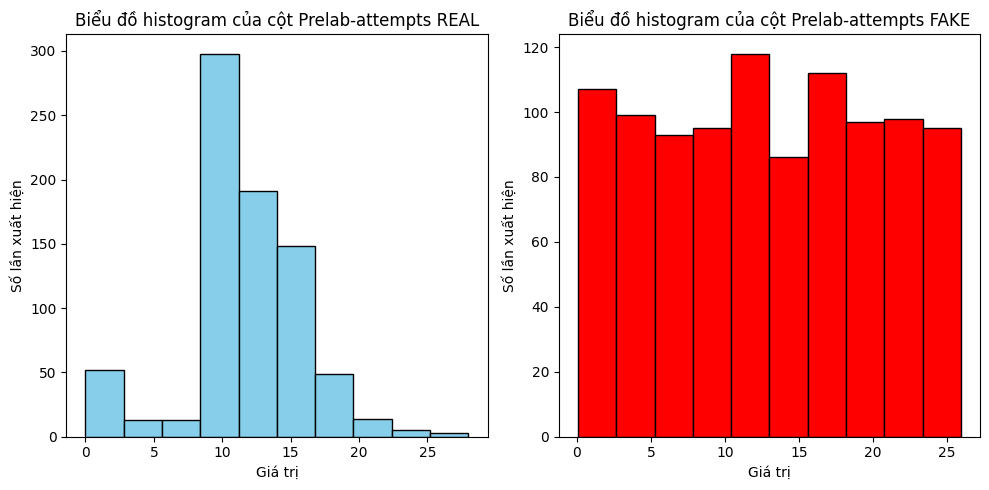

In [44]:

Real = lab1['Prelab-attempts']
Fake = df['Prelab-attempts']

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(Real, color='skyblue', edgecolor='black')
plt.xlabel('Giá trị')
plt.ylabel('Số lần xuất hiện')
plt.title('Biểu đồ histogram của cột Prelab-attempts REAL')
plt.subplot(1, 2, 2)
plt.hist(Fake, color='red', edgecolor='black')
plt.xlabel('Giá trị')
plt.ylabel('Số lần xuất hiện')
plt.title('Biểu đồ histogram của cột Prelab-attempts FAKE')
plt.tight_layout()
plt.show()


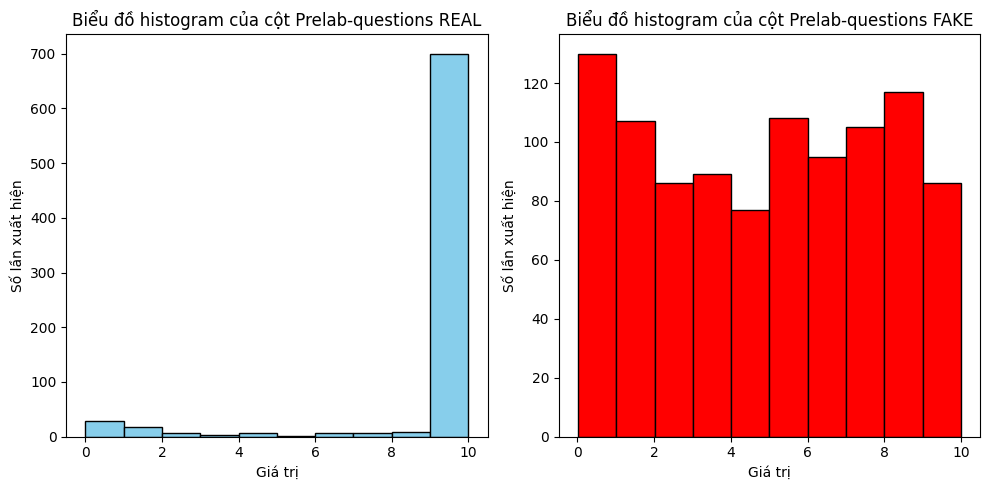

In [45]:

Real = lab1['Prelab-questions']
Fake = df['Prelab-questions']
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(Real, color='skyblue', edgecolor='black')
plt.xlabel('Giá trị')
plt.ylabel('Số lần xuất hiện')
plt.title('Biểu đồ histogram của cột Prelab-questions REAL')
plt.subplot(1, 2, 2)
plt.hist(Fake, color='red', edgecolor='black')
plt.xlabel('Giá trị')
plt.ylabel('Số lần xuất hiện')
plt.title('Biểu đồ histogram của cột Prelab-questions FAKE')
plt.tight_layout()
plt.show()


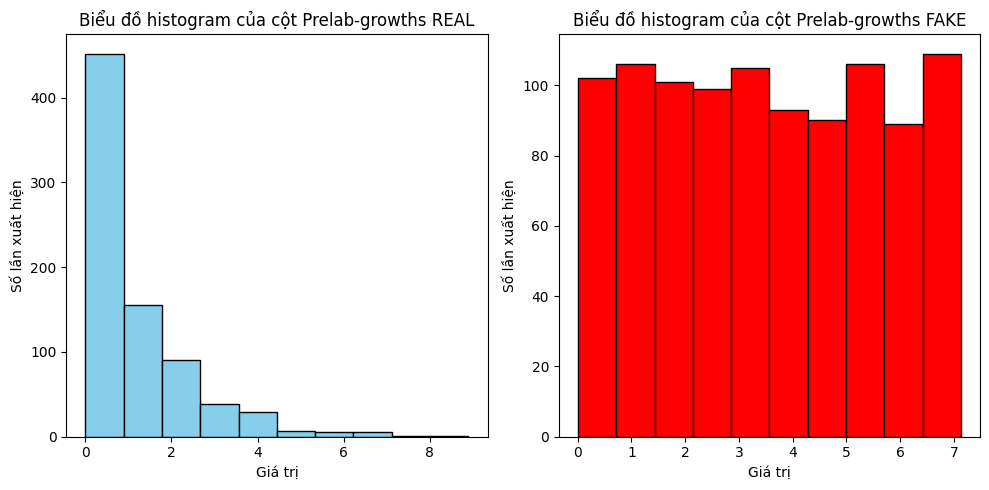

In [46]:

Real = lab1['Prelab-growths']
Fake = df['Prelab-growths']
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(Real, color='skyblue', edgecolor='black')
plt.xlabel('Giá trị')
plt.ylabel('Số lần xuất hiện')
plt.title('Biểu đồ histogram của cột Prelab-growths REAL')
plt.subplot(1, 2, 2)
plt.hist(Fake, color='red', edgecolor='black')
plt.xlabel('Giá trị')
plt.ylabel('Số lần xuất hiện')
plt.title('Biểu đồ histogram của cột Prelab-growths FAKE')
plt.tight_layout()
plt.show()


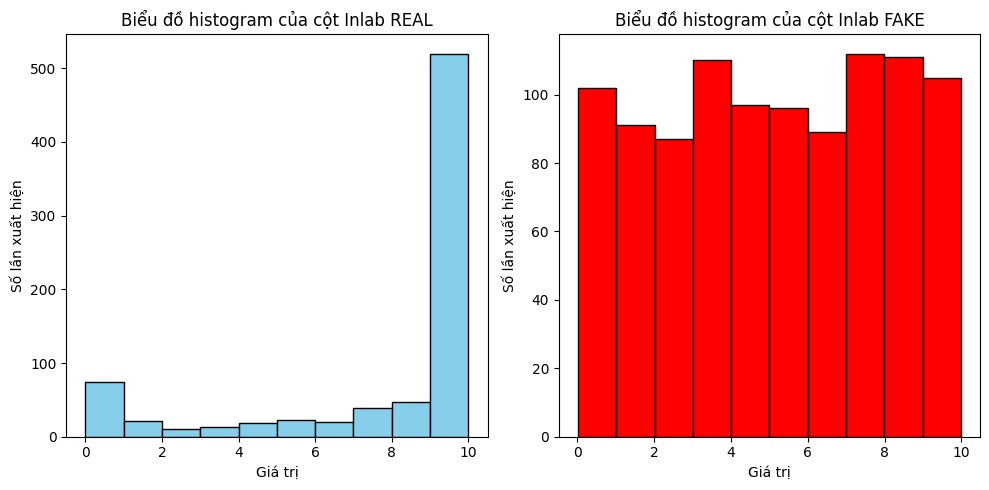

In [47]:

Real = lab1['Inlab']
Fake = df['Inlab']
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(Real, color='skyblue', edgecolor='black')
plt.xlabel('Giá trị')
plt.ylabel('Số lần xuất hiện')
plt.title('Biểu đồ histogram của cột Inlab REAL')
plt.subplot(1, 2, 2)
plt.hist(Fake, color='red', edgecolor='black')
plt.xlabel('Giá trị')
plt.ylabel('Số lần xuất hiện')
plt.title('Biểu đồ histogram của cột Inlab FAKE')
plt.tight_layout()
plt.show()


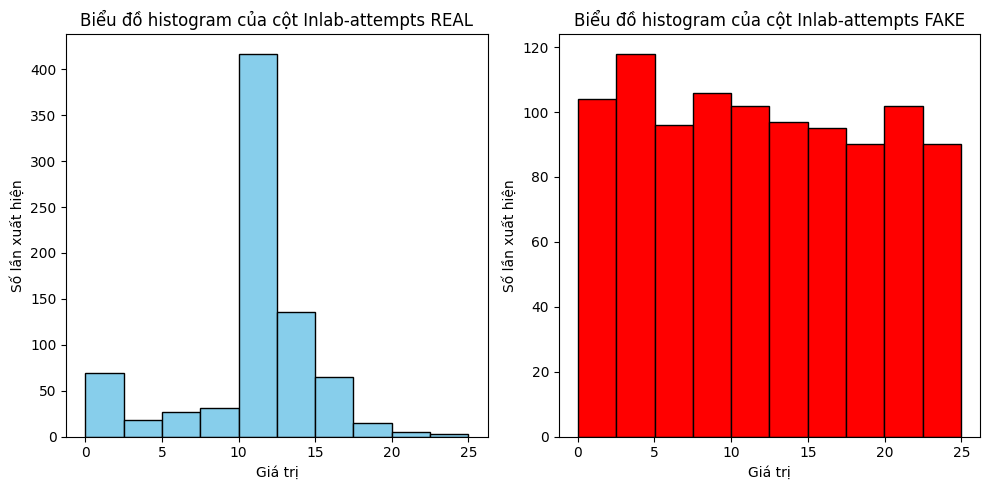

In [48]:

Real = lab1['Inlab-attempts']
Fake = df['Inlab-attempts']
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(Real, color='skyblue', edgecolor='black')
plt.xlabel('Giá trị')
plt.ylabel('Số lần xuất hiện')
plt.title('Biểu đồ histogram của cột Inlab-attempts REAL')
plt.subplot(1, 2, 2)
plt.hist(Fake, color='red', edgecolor='black')
plt.xlabel('Giá trị')
plt.ylabel('Số lần xuất hiện')
plt.title('Biểu đồ histogram của cột Inlab-attempts FAKE')
plt.tight_layout()
plt.show()


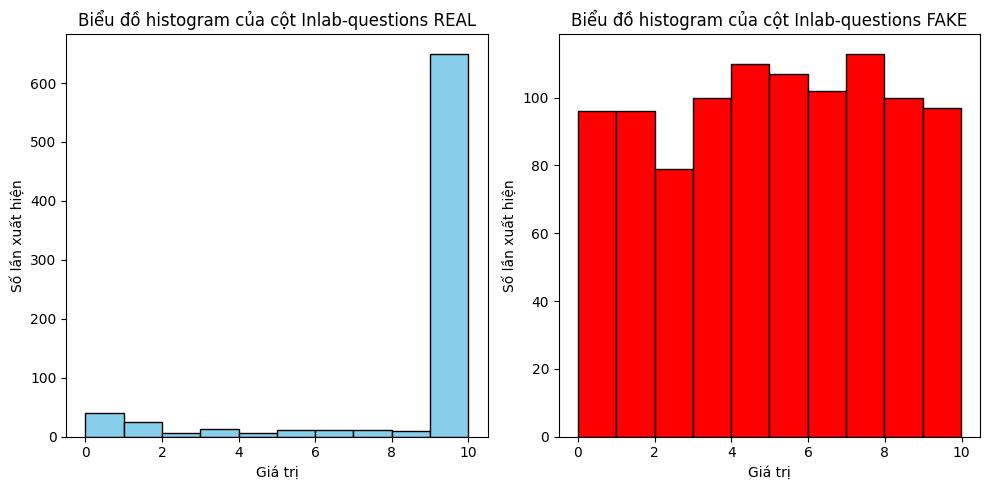

In [49]:

Real = lab1['Inlab-questions']
Fake = df['Inlab-questions']
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(Real, color='skyblue', edgecolor='black')
plt.xlabel('Giá trị')
plt.ylabel('Số lần xuất hiện')
plt.title('Biểu đồ histogram của cột Inlab-questions REAL')
plt.subplot(1, 2, 2)
plt.hist(Fake, color='red', edgecolor='black')
plt.xlabel('Giá trị')
plt.ylabel('Số lần xuất hiện')
plt.title('Biểu đồ histogram của cột Inlab-questions FAKE')
plt.tight_layout()
plt.show()


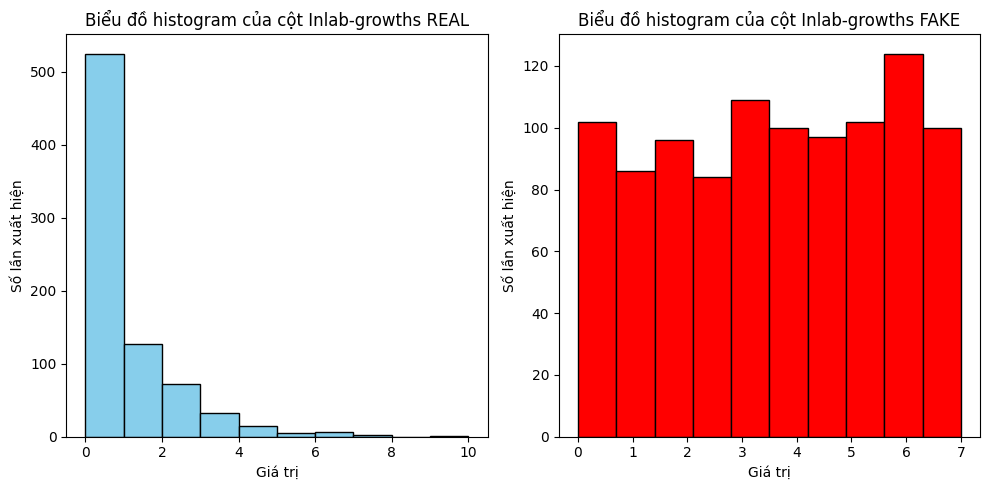

In [50]:

Real = lab1['Inlab-growths']
Fake = df['Inlab-growths']

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.hist(Real, color='skyblue', edgecolor='black')
plt.xlabel('Giá trị')
plt.ylabel('Số lần xuất hiện')
plt.title('Biểu đồ histogram của cột Inlab-growths REAL')

plt.subplot(1, 2, 2)
plt.hist(Fake, color='red', edgecolor='black')
plt.xlabel('Giá trị')
plt.ylabel('Số lần xuất hiện')
plt.title('Biểu đồ histogram của cột Inlab-growths FAKE')

plt.tight_layout()
plt.show()


## tách nhỏ

In [51]:

def generate_fake_samples(generator, latent_dim, n_samples, col_mins, col_maxs):
    x_input = np.random.randn(latent_dim * n_samples)
    x_input = x_input.reshape(n_samples, latent_dim)
    X = generator.predict(x_input)
    for i in range(X.shape[1]):
        X[:, i] = X[:, i] * (col_maxs[i] - col_mins[i]) + col_mins[i]
    y = np.zeros((n_samples, 1))
    return X, y
def print_fake_samples(X):
    print("Generated fake samples:")
    print(X)
latent_dim = 100
n_samples = 100
col_mins = np.zeros(latent_dim)  
col_maxs = np.ones(latent_dim)   
fake_samples, _ = generate_fake_samples(generator, latent_dim, n_samples, col_mins, col_maxs)
print_fake_samples(fake_samples)


4/4 [==============================] - 0s 5ms/step
Generated fake samples:
[[3.63020721e-04 2.04671174e-04 1.09336528e-04 7.32999877e-04
  7.77997047e-05 7.60117400e-05 3.09874595e-05 1.00639416e-04]
 [2.58131162e-03 8.44034133e-04 5.95372752e-04 3.70068941e-03
  5.42563677e-04 4.62806027e-04 2.72952399e-04 1.70827797e-03]
 [1.83065515e-03 1.14758895e-03 3.34276672e-04 5.26705710e-03
  3.63793602e-04 6.25805755e-04 7.20852520e-04 9.14315751e-04]
 [6.28136506e-04 2.28423029e-04 1.52757275e-04 8.14522675e-04
  7.49323517e-05 8.49424832e-05 7.93716536e-05 2.16709508e-04]
 [1.65635243e-03 3.08013079e-03 4.30725602e-04 3.32691870e-03
  3.09985451e-04 1.20403362e-03 4.25702921e-04 3.59017664e-04]
 [4.54816851e-04 5.75201062e-04 1.66565573e-04 1.79844431e-03
  1.69000952e-04 3.85954889e-04 2.04137919e-04 3.58771329e-04]
 [4.12280951e-03 3.98604712e-03 9.78039345e-04 9.08983033e-03
  2.87432456e-03 2.03536707e-03 1.34475075e-03 1.64973433e-03]
 [1.82361735e-04 1.90697494e-04 4.55289774e-05 4.6

In [52]:

column_names = ['Prelab', 'Prelab-attempts', 'Prelab-questions', 'Prelab-growths',
       'Inlab', 'Inlab-attempts', 'Inlab-questions', 'Inlab-growths']
df = pd.DataFrame(new_fake_data, columns=column_names)
print(df)

       Prelab  Prelab-attempts  Prelab-questions  Prelab-growths     Inlab  \
0    9.325319         5.657410          8.400036        5.014942  3.443908   
1    1.084230        14.339065          1.433212        2.495795  4.953879   
2    4.664483         1.555681          1.135236        4.555367  7.489312   
3    5.014605        14.120674          4.152537        1.611007  6.690076   
4    8.216860         1.943582          5.081954        2.101214  0.973089   
..        ...              ...               ...             ...       ...   
995  7.163588        14.841437          6.890992        6.804000  3.487711   
996  0.356599        15.541649          8.217796        5.263880  8.705302   
997  1.764008        13.837251          4.396466        5.321474  7.796814   
998  1.598733        22.194464          8.397851        3.440321  8.682423   
999  0.082972        17.117931          1.115497        3.403154  0.882514   

     Inlab-attempts  Inlab-questions  Inlab-growths  
0        

In [53]:
Inlab_data = df['Inlab']


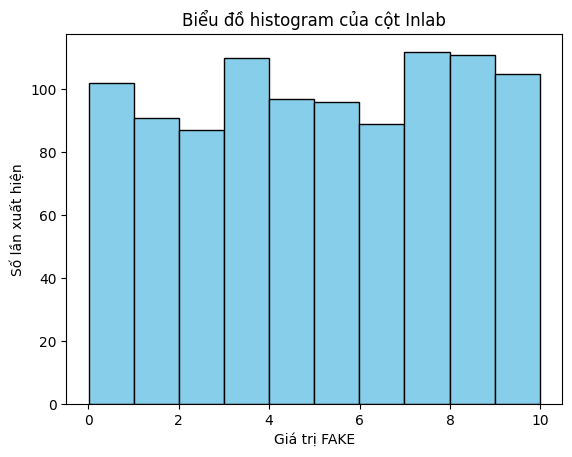

In [54]:
plt.hist(Inlab_data, bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Giá trị FAKE')
plt.ylabel('Số lần xuất hiện')
plt.title('Biểu đồ histogram của cột Inlab')
plt.show()

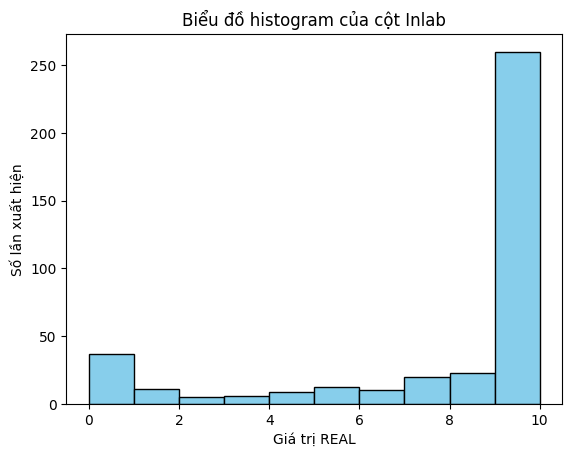

In [55]:
real_data = X_train['Inlab']
plt.hist(real_data, bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Giá trị REAL')
plt.ylabel('Số lần xuất hiện')
plt.title('Biểu đồ histogram của cột Inlab')
plt.show()

# out come